In [1]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Real Estate Data V21.csv")
df

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes
...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes


In [3]:
df['Location']

,Location
0,"Kanathur Reddikuppam, Chennai"
1,"Ramanathan Nagar, Pozhichalur,Chennai"
2,"Kasthuribai Nagar, West Tambaram,Chennai"
3,"Naveenilaya,Chepauk, Triplicane,Chennai"
4,"Avadi, Chennai"
...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi"
14524,"Rawta, Jaffarpur Kalan,New Delhi"
14525,"Rani Garden, Geeta Colony,New Delhi"
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N..."


In [4]:
!pip install spacy
import spacy

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
col=df['Description']

In [7]:
doc=nlp(col[0])
print(doc)

Best 4 BHK Apartment for modern-day lifestyle is now available for sale. No brokerage involved, Posted by Owner. Grab this 4 BHK property for sale in one of Chennai's top location, Kanathur Reddikuppam. It is situated on floor 13. The total number of floors in this Apartment is 14. The property price of this unit is Rs 1.99 Cr. The built-up area is 2583 Square feet. There are 4 bedrooms and 4 bathroom. It is an ideal location for young families with kids, as this property is close to Mount Litera Zee School, OMR, Chennai, Amelio Early Education - Siruseri, and Chennai Mathematical Institute. H...


In [8]:

# for token in doc:
#     print(token.text, "| POS:", token.pos_, "| Lemma:", token.lemma_)
#     print()

In [9]:
m = len(col)
d = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10}

def fun(doc):
    res = set()
    bhk = None
    rooms = None

    for token in doc:
        word = token.text.lower()
        if token.like_num:
            rooms = token.text


        if word in d:
            rooms = d[word]



        # For Bedrooms
        if word == "bedrooms":
            bhk = "Bedrooms"
            res.add(f"{bhk} {rooms}")

        # For Bathroom(s)
        if word in ['bathroom', 'bathrooms']:
            bhk = "Bathroom"
            res.add(f"{bhk} {rooms}")

    return res

# for i in range(m):
#     doc = nlp(col[i])
#     if(fun(doc) is not None):
#       print(fun(doc))
#     print()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


In [11]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


In [12]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Name: 9998 unique values
Property Title: 6507 unique values
Price: 891 unique values
Location: 7050 unique values
Total_Area: 1774 unique values
Price_per_SQFT: 2094 unique values
Description: 14490 unique values
Baths: 6 unique values
Balcony: 2 unique values


In [13]:
def extract_bedrooms_nlp(text):
    text = str(text).lower()
    doc = nlp(text)

    # Dictionary for word → number
    word_to_num = {
        "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10,
        "eleven": 11, "twelve": 12
    }



    for token in doc:
        if token.like_num:
            try:
                num = int(token.text) #"3" "2"
            except ValueError:
                num = word_to_num.get(token.text.lower())  # "Three" , "Two"

            if num is None:
                continue

            # Check nearby tokens for bedroom keywords
            next_tokens = [t.text for t in doc[token.i:token.i+3]]
            if any(w in next_tokens for w in ["bhk", "bedroom", "bedrooms", "room", "rooms"]):
                return num
    return None

In [14]:
df["Num_Bedrooms"] = df["Property Title"].apply(extract_bedrooms_nlp)
print(df[["Property Title", "Num_Bedrooms"]].head(20))


                                       Property Title  Num_Bedrooms
0   4 BHK Flat for sale in Kanathur Reddikuppam, C...           4.0
1   10 BHK Independent House for sale in Pozhichal...          10.0
2       3 BHK Flat for sale in West Tambaram, Chennai           3.0
3   7 BHK Independent House for sale in Triplicane...           7.0
4               2 BHK Flat for sale in Avadi, Chennai           2.0
5            2 BHK Flat for sale in Siruseri, Chennai           2.0
6           2 BHK Flat for sale in Sembakkam, Chennai           2.0
7   3 BHK Independent House for sale in Mahindra W...           3.0
8       2 BHK Flat for sale in West Tambaram, Chennai           2.0
9           1 BHK Flat for sale in Chromepet, Chennai           1.0
10  1 BHK Flat for sale in Mahindra World City, Ch...           1.0
11       3 BHK Flat for sale in Pallikaranai, Chennai           3.0
12     6 BHK Villa for sale in West Mambalam, Chennai           6.0
13        2 BHK Flat for sale in Ashok Nagar, Ch

In [15]:


df['Num_Bedrooms'].fillna(df['Num_Bedrooms'].mode()[0], inplace=True)
df['Num_Bedrooms'].isnull().sum()

/tmp/ipython-input-3143199217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Bedrooms'].fillna(df['Num_Bedrooms'].mode()[0], inplace=True)


np.int64(0)

In [17]:
def extract_bathrooms_nlp(text):
    text = str(text).lower()
    doc = nlp(text)

    # Dictionary for word → number
    word_to_num = {
        "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10,
        "eleven": 11, "twelve": 12
    }

    for token in doc:
        if token.like_num:
            try:
                num = int(token.text) #"3" "2"
            except ValueError:
                num = word_to_num.get(token.text.lower())  # "Three" , "Two"

            if num is None:
                continue

            # Check nearby tokens for bedroom keywords
            next_tokens = [t.text for t in doc[token.i:token.i+3]]
            if any(w in next_tokens for w in [ "bathroom", "bathrooms", "room", "rooms"]):
                return num
    return None


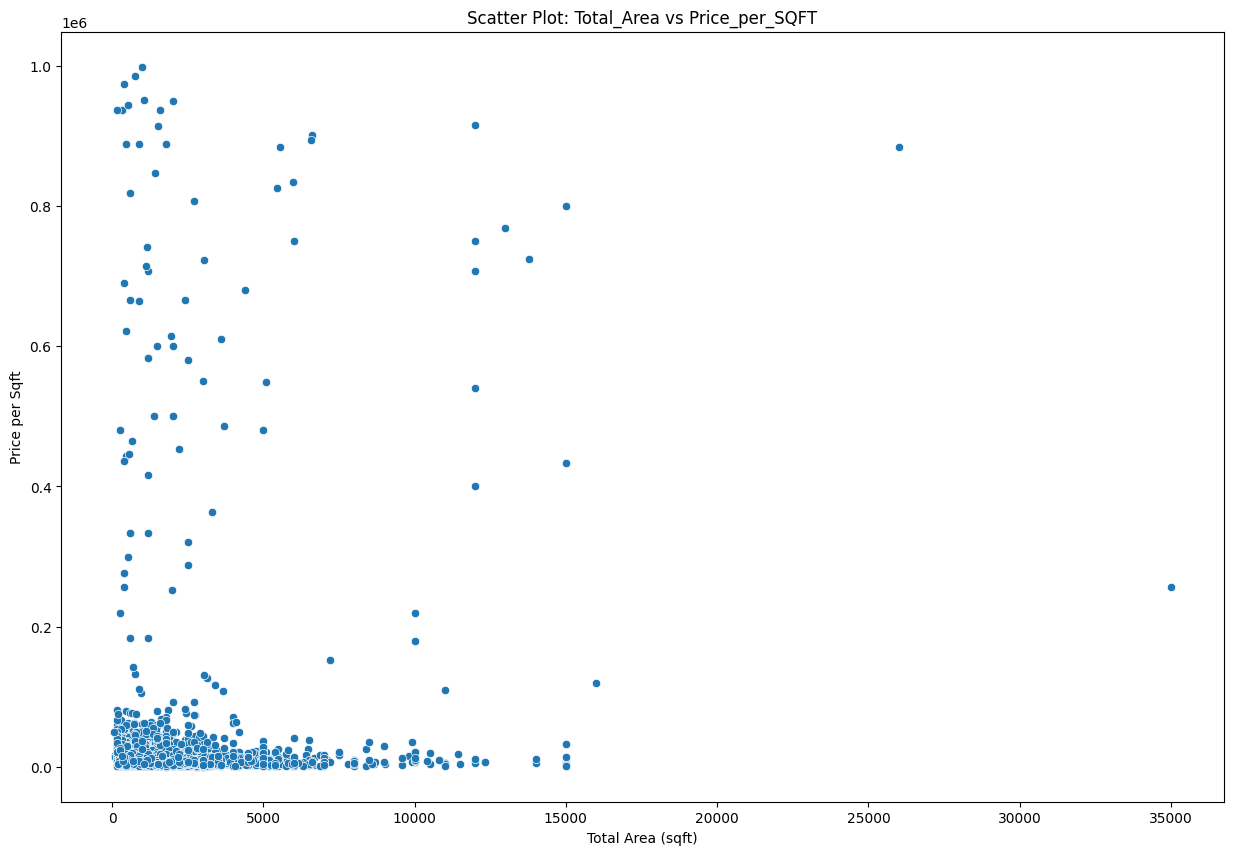

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15,10))
sns.scatterplot(x='Total_Area', y='Price_per_SQFT', data=df)

# Define y-axis ticks (from 1000 to 20000 with step 1000)

plt.title("Scatter Plot: Total_Area vs Price_per_SQFT")
plt.xlabel("Total Area (sqft)")
plt.ylabel("Price per Sqft")
plt.show()




In [19]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony', 'Num_Bedrooms'],
      dtype='object')

In [20]:

df['Price_per_SQFT']

,Price_per_SQFT
0,7700.0
1,3210.0
2,7580.0
3,7840.0
4,5000.0
...,...
14523,3800.0
14524,2970.0
14525,7940.0
14526,8570.0


In [21]:
df['Total_Area']

,Total_Area
0,2583
1,7000
2,1320
3,4250
4,960
...,...
14523,1053
14524,472
14525,378
14526,700


In [22]:
df["balcony_encoded"] = df["Balcony"].map({"Yes": 1, "No": 0})
df['balcony_encoded'].head(10)

,balcony_encoded
0,1
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,0


In [23]:
df

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Num_Bedrooms,balcony_encoded
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4.0,1
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10.0,1
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3.0,0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7.0,1
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes,2.0,1
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes,1.0,1
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes,1.0,1
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes,3.0,1


In [24]:
def extract_bathrooms_nlp(text):
    text = str(text).lower()
    doc = nlp(text)

    # Dictionary for word → number
    word_to_num = {
        "one": 1, "two": 2, "three": 3, "four": 4, "five": 5,
        "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10,
        "eleven": 11, "twelve": 12
    }

    for token in doc:
        if token.like_num:
            try:
                num = int(token.text) #"3" "2"
            except ValueError:
                num = word_to_num.get(token.text.lower())  # "Three" , "Two"

            if num is None:
                continue

            # Check nearby tokens for bedroom keywords
            next_tokens = [t.text for t in doc[token.i:token.i+3]]
            if any(w in next_tokens for w in [ "bathroom", "bathrooms", "room", "rooms"]):
                return num
    return None

In [25]:
df['rooms']=df['Num_Bedrooms']+df['Baths']
df['rooms']

,rooms
0,8.0
1,16.0
2,6.0
3,12.0
4,5.0
...,...
14523,5.0
14524,3.0
14525,2.0
14526,5.0


In [26]:

df['rooms'].fillna(df['rooms'].mode()[0], inplace=True)
df['rooms'].isnull().sum()

np.int64(0)

In [27]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0
Num_Bedrooms,0


In [28]:
df['Num_Bedrooms']

,Num_Bedrooms
0,4.0
1,10.0
2,3.0
3,7.0
4,2.0
...,...
14523,2.0
14524,1.0
14525,1.0
14526,3.0


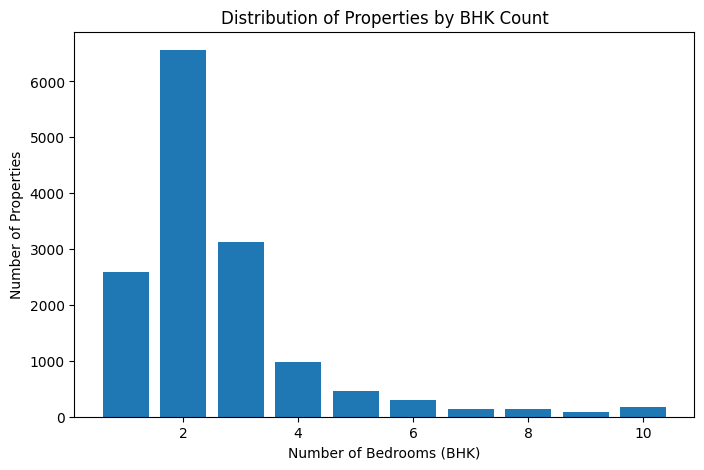

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


# Count number of properties by bedrooms
bhk_counts = df['Num_Bedrooms'].value_counts().sort_index()


plt.figure(figsize=(8,5))
plt.bar(bhk_counts.index, bhk_counts.values)
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Number of Properties")
plt.title("Distribution of Properties by BHK Count")
plt.show()

In [30]:
avg_price_per_bhk = df.groupby('Num_Bedrooms')['Price_per_SQFT'].mean()
print(avg_price_per_bhk)

Num_Bedrooms
1.0     12360.108275
2.0     11034.779759
3.0     11063.552210
4.0     11869.035533
5.0     19693.282609
6.0     14208.711864
7.0      9042.237762
8.0     16626.969697
9.0     11773.717949
10.0    12107.168675
Name: Price_per_SQFT, dtype: float64


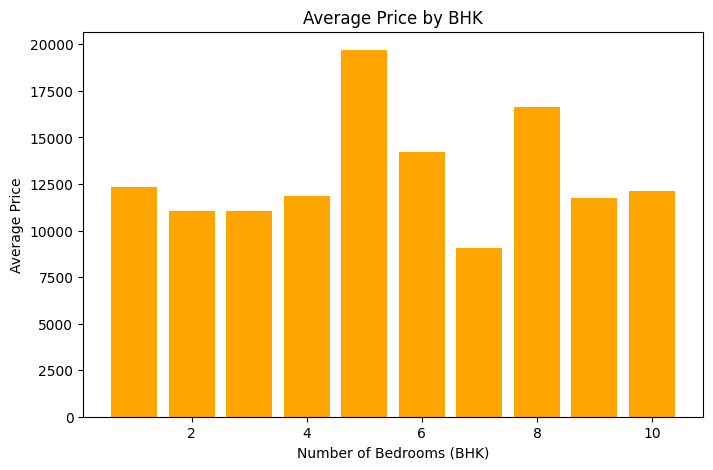

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_price_per_bhk.index, avg_price_per_bhk.values, color="orange")
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Average Price")
plt.title("Average Price by BHK")
plt.show()

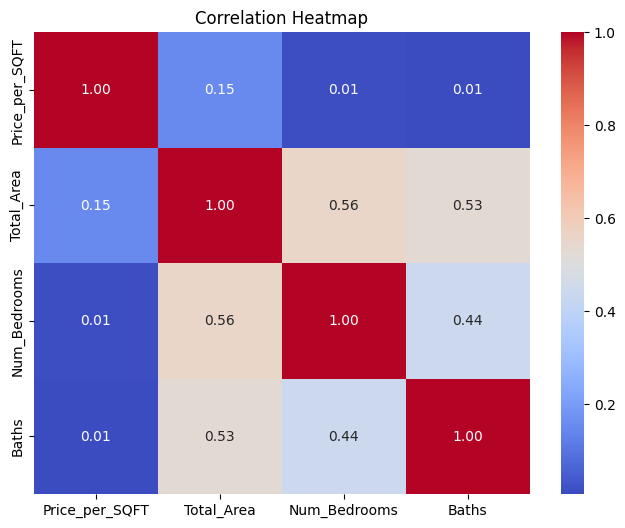

In [32]:
plt.figure(figsize=(8,6))
#width 8 height 6
sns.heatmap(df[["Price_per_SQFT", "Total_Area", "Num_Bedrooms", "Baths", "Balcony"]].corr(numeric_only=True),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-4051568193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


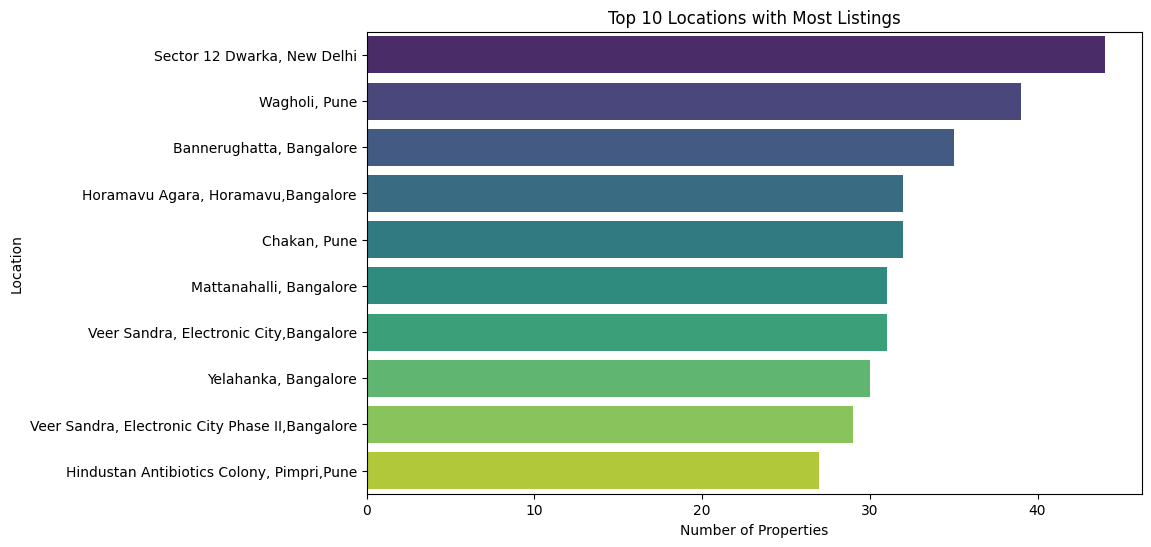

In [33]:
top_locations = df["Location"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Locations with Most Listings")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.show()

In [ ]:
df.columns


In [34]:
df['Price']


,Price
0,₹1.99 Cr
1,₹2.25 Cr
2,₹1.0 Cr
3,₹3.33 Cr
4,₹48.0 L
...,...
14523,₹40.0 L
14524,₹14.0 L
14525,₹30.0 L
14526,₹60.0 L


In [35]:
import pandas as pd

def convert_price(value):
    value = str(value).replace("₹", "").strip()

    if "acs" in value:
        return None # Handle 'acs' case explicitly
    elif "Cr" in value:
        return float(value.replace("Cr", "").strip()) * 100
    elif "L" in value:
        return float(value.replace("L", "").strip())
    else:
        return None

df["Price_num"] = df["Price"].apply(convert_price)

print(df[["Price", "Price_num"]].head(10))

      Price  Price_num
0  ₹1.99 Cr     199.00
1  ₹2.25 Cr     225.00
2   ₹1.0 Cr     100.00
3  ₹3.33 Cr     333.00
4   ₹48.0 L      48.00
5   ₹40.0 L      40.00
6   ₹60.0 L      60.00
7  ₹72.35 L      72.35
8   ₹42.0 L      42.00
9   ₹30.0 L      30.00


In [36]:

df['Price_num'].fillna(df['Price_num'].mean(), inplace=True)
df['Price_num'].isnull().sum()

/tmp/ipython-input-2418425704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_num'].fillna(df['Price_num'].mean(), inplace=True)


np.int64(0)

In [37]:
df.dtypes

,0
Name,object
Property Title,object
Price,object
Location,object
Total_Area,int64
Price_per_SQFT,float64
Description,object
Baths,int64
Balcony,object
Num_Bedrooms,float64


In [38]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Num_Bedrooms,balcony_encoded,rooms,Price_num
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4.0,1,8.0,199.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10.0,1,16.0,225.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3.0,0,6.0,100.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7.0,1,12.0,333.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2.0,1,5.0,48.0


In [39]:
df.isna().sum()



,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0
Num_Bedrooms,0


In [40]:
df.to_excel("output.xlsx", index=False)

features
   Total_Area  Num_Bedrooms  Price_per_SQFT  rooms  balcony_encoded  \
0        2583           4.0          7700.0    8.0                1   
1        7000          10.0          3210.0   16.0                1   
2        1320           3.0          7580.0    6.0                0   
3        4250           7.0          7840.0   12.0                1   
4         960           2.0          5000.0    5.0                1   

   property_type_encoded  
0                      0  
1                      1  
2                      0  
3                      1  
4                      0  
Target varible
0    199.0
1    225.0
2    100.0
3    333.0
4     48.0
Name: Price_num, dtype: float64
Intercept: -16.844108305893982
Coefficients: [ 5.20468051e-02  1.67086495e+01 -1.16821633e-04  9.28902014e-01
  9.25082782e+00  1.25244652e+01]
Feature names: ['Total_Area', 'Num_Bedrooms', 'Price_per_SQFT', 'rooms', 'balcony_encoded', 'property_type_encoded']
R² Score: 0.27904087644789966


In [43]:
df['Location']

,Location
0,"Kanathur Reddikuppam, Chennai"
1,"Ramanathan Nagar, Pozhichalur,Chennai"
2,"Kasthuribai Nagar, West Tambaram,Chennai"
3,"Naveenilaya,Chepauk, Triplicane,Chennai"
4,"Avadi, Chennai"
...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi"
14524,"Rawta, Jaffarpur Kalan,New Delhi"
14525,"Rani Garden, Geeta Colony,New Delhi"
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N..."


In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#Extract property type
def extract_property_type(title):
    title = str(title).lower()
    if "villa" in title:
        return "villa"
    elif "apartment" in title:
        return "apartments"
    elif "flat" in title:
        return "flat"
    elif "independent" in title:
        return "independence"
    else:
        return "other"

df["property_type"] = df["Property Title"].apply(extract_property_type)


encoder = LabelEncoder()
df["property_type_encoded"] = encoder.fit_transform(df["property_type"])

print(df)
print("Classes:", encoder.classes_)



                                                    Name  \
0                                       Casagrand ECR 14   
1                  Ramanathan Nagar, Pozhichalur,Chennai   
2                                            DAC Prapthi   
3                Naveenilaya,Chepauk, Triplicane,Chennai   
4                               VGN Spring Field Phase 1   
...                                                  ...   
14523      Krishna Park Extension, Tilak Nagar,New Delhi   
14524                   Rawta, Jaffarpur Kalan,New Delhi   
14525                Rani Garden, Geeta Colony,New Delhi   
14526  Lig flat rohini,Sector 16E, Sector 16 Rohini,N...   
14527               Sector 3B, Sector 3 Rohini,New Delhi   

                                          Property Title     Price  \
0      4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1      10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2          3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   

In [49]:
df["property_type_encoded"].value_counts()


,count
property_type_encoded,
0,9686
1,4105
2,737


In [51]:
res=df['Location'].str.split(',',n=2,expand=True).head(10)
res

,0,1,2
0,Kanathur Reddikuppam,Chennai,None
1,Ramanathan Nagar,Pozhichalur,Chennai
2,Kasthuribai Nagar,West Tambaram,Chennai
3,Naveenilaya,Chepauk,"Triplicane,Chennai"
4,Avadi,Chennai,None
5,Siruseri,Chennai,None
6,THIRAN FLATS,Gowrivakkam,"Sembakkam,Chennai"
7,Mahindra World City,Chennai,None
8,Brindavan Colony,West Tambaram,Chennai
9,New Colony,Chromepet,Chennai


In [52]:
# Split location into multiple columns
split_loc = df["Location"].str.split(",", expand=True)
df['Area']=(split_loc[0])
df['Area']

,Area
0,Kanathur Reddikuppam
1,Ramanathan Nagar
2,Kasthuribai Nagar
3,Naveenilaya
4,Avadi
...,...
14523,Krishna Park Extension
14524,Rawta
14525,Rani Garden
14526,Lig flat rohini


In [53]:
split_loc = df["Location"].str.split(",", expand=True).apply(lambda x: x.str.strip())

# Extract City (last non-empty part)
df["City"] = split_loc.ffill(axis=1).iloc[:, -1]

print(df['City'])

0          Chennai
1          Chennai
2          Chennai
3          Chennai
4          Chennai
           ...    
14523    New Delhi
14524    New Delhi
14525    New Delhi
14526    New Delhi
14527    New Delhi
Name: City, Length: 14528, dtype: object


In [54]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony', 'Num_Bedrooms',
       'balcony_encoded', 'rooms', 'Price_num', 'property_type',
       'property_type_encoded', 'Area', 'City'],
      dtype='object')

In [55]:
df.dtypes

,0
Name,object
Property Title,object
Price,object
Location,object
Total_Area,int64
Price_per_SQFT,float64
Description,object
Baths,int64
Balcony,object
Num_Bedrooms,float64


In [71]:
import numpy as np


num_cols = ["Price_num", "rooms", "Price_per_SQFT",
            "Total_Area", "property_type_encoded", "balcony_encoded"]

df[num_cols] = df[num_cols].apply(lambda x: np.log1p(x))


print(df[num_cols].head())

   Price_num     rooms  Price_per_SQFT  Total_Area  property_type_encoded  \
0   0.788044  0.796190       -0.081331    0.873690              -1.204356   
1   0.872567  1.327355       -0.739653    1.345280               0.832079   
2   0.219170  0.309888       -0.093658    0.341917              -1.204356   
3   1.116095  1.156058       -0.067179    1.137527               0.832079   
4  -0.687531 -0.410178       -0.415263   -0.072372              -1.204356   

   balcony_encoded  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:

from sklearn.preprocessing import StandardScaler
num_cols = ["Price_num",'rooms','Price_per_SQFT','Total_Area','property_type_encoded','balcony_encoded']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Num_Bedrooms,balcony_encoded,rooms,Price_num,property_type,property_type_encoded,Area,City
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",1.054181,0.178554,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4.0,0.0,1.461650,1.041678,flat,-0.705988,Kanathur Reddikuppam,Chennai
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",1.583813,-1.125498,Looking for a 10 BHK Independent House for sal...,6,Yes,10.0,0.0,2.578298,1.120116,independence,1.372372,Ramanathan Nagar,Chennai
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",0.456959,0.154135,"Property for sale in Tambaram, Chennai. This 3...",3,No,3.0,0.0,0.439315,0.513766,flat,-0.705988,Kasthuribai Nagar,Chennai
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",1.350490,0.206587,Entire Building for sale with 7 units of singl...,5,Yes,7.0,0.0,2.218185,1.346109,independence,1.372372,Naveenilaya,Chennai
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",-0.008319,-0.482923,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2.0,0.0,-1.074452,-0.327650,flat,-0.705988,Avadi,Chennai


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = df.fillna(0)
y = df['Price_num']


X =df[['Total_Area', 'Num_Bedrooms', 'Price_per_SQFT','rooms','balcony_encoded','property_type_encoded']]

print("features")
print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature names:", X.columns.tolist())

#performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)



features
   Total_Area  Num_Bedrooms  Price_per_SQFT     rooms  balcony_encoded  \
0    1.395735           4.0       -0.078111  1.217078              0.0   
1    2.839263          10.0       -0.522721  2.771056              0.0   
2    0.407644           3.0       -0.089406  0.363272              0.0   
3    2.119046           7.0       -0.064972  2.177382              0.0   
4   -0.069815           2.0       -0.339834 -0.336468              0.0   

   property_type_encoded  
0              -0.700115  
1               1.298091  
2              -0.700115  
3               1.298091  
4              -0.700115  
0    1.199090
1    1.393046
2    0.245043
3    2.052910
4   -0.497184
Name: Price_num, dtype: float64
Intercept: -0.28088854939574764
Coefficients: [0.48688423 0.10925339 0.22703153 0.09892892 0.         0.00571371]
Feature names: ['Total_Area', 'Num_Bedrooms', 'Price_per_SQFT', 'rooms', 'balcony_encoded', 'property_type_encoded']
R² Score: 0.5510964525378109
